In [108]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



In [125]:
# csv -> dataframe
df = pd.read_csv("Fish.csv")


In [126]:
# Display the first five rows
df.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [123]:
# Rename Length-columns to easier understand the dataset
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    159 non-null    object 
 1   Weight     159 non-null    float64
 2   LengthVer  159 non-null    float64
 3   LengthDia  159 non-null    float64
 4   LengthCro  159 non-null    float64
 5   Height     159 non-null    float64
 6   Width      159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [112]:
# Check if there are NaN values in the dataset we need to remove
print(str('Are there NaN values in the dataset? '), df.isnull().values.any())


Are there NaN values in the dataset?  False


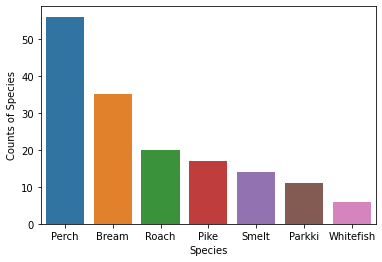

In [113]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)

sns.barplot(x=sp.index, y=sp['Species'])
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()


In [114]:
# Converting Qualitative data into Quantitative Data for the model
df.loc[df["Species"] == "Perch", ["Species"]] = 0
df.loc[df["Species"] == "Bream", ["Species"]] = 1
df.loc[df["Species"] == "Roach", ["Species"]] = 2
df.loc[df["Species"] == "Pike", ["Species"]] = 3
df.loc[df["Species"] == "Smelt", ["Species"]] = 4
df.loc[df["Species"] == "Parkki", ["Species"]] = 5
df.loc[df["Species"] == "Whitefish", ["Species"]] = 6


In [115]:
df

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,4,12.2,11.5,12.2,13.4,2.0904,1.3936
155,4,13.4,11.7,12.4,13.5,2.4300,1.2690
156,4,12.2,12.1,13.0,13.8,2.2770,1.2558
157,4,19.7,13.2,14.3,15.2,2.8728,2.0672


In [116]:
# Defining X and y; features and target.
X = df[["Species", "LengthVer", "LengthDia", "LengthCro", "Height", "Width"]]
y = df["Weight"]

In [117]:
# Split the dataset into training and testing/validation datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [118]:
# Define the random forest regressor model.
fishRegressor = RandomForestRegressor(random_state=1, n_estimators=500)

# Fit the model with the training data
fishRegressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=1)

In [127]:
# Make validation predictions and calculate mean absolute error
val_predictions = fishRegressor.predict(X_test)

# Get validation mae
val_mae = mean_absolute_error(val_predictions, y_test)
print("Validation MAE: {:,.0f}grams".format(val_mae))
print(max(y))
print(min(y))

Validation MAE: 37grams
1650.0
0.0


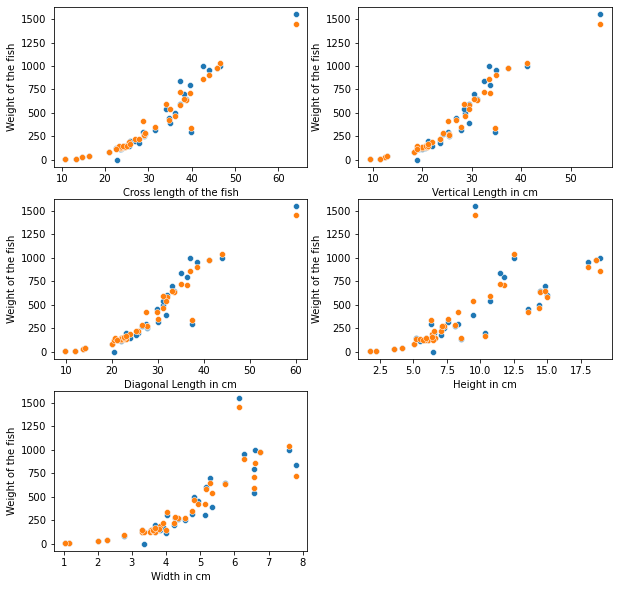

In [120]:
f, axes = plt.subplots(3, 2, figsize=(10, 10))


sns.title="Model for Weight Estimation"

sns.scatterplot(x=X_test['LengthCro'], y=y_test, ax=axes[0][0])
sns.scatterplot(x=X_test['LengthCro'], y=val_predictions, ax=axes[0][0])
axes[0][0].set(xlabel="Cross length of the fish", ylabel="Weight of the fish")

sns.scatterplot(x=X_test['LengthVer'], y=y_test, ax=axes[0][1])
sns.scatterplot(x=X_test['LengthVer'], y=val_predictions, ax=axes[0][1])
axes[0][1].set(xlabel="Vertical Length in cm", ylabel="Weight of the fish")

sns.scatterplot(x=X_test['LengthDia'], y=y_test, ax=axes[1][0])
sns.scatterplot(x=X_test['LengthDia'], y=val_predictions, ax=axes[1][0])
axes[1][0].set(xlabel="Diagonal Length in cm", ylabel="Weight of the fish")

sns.scatterplot(x=X_test['Height'], y=y_test, ax=axes[1][1])
sns.scatterplot(x=X_test['Height'], y=val_predictions, ax=axes[1][1])
axes[1][1].set(xlabel="Height in cm", ylabel="Weight of the fish")

sns.scatterplot(x=X_test['Width'], y=y_test, ax=axes[2][0])
sns.scatterplot(x=X_test['Width'], y=val_predictions, ax=axes[2][0])
axes[2][0].set(xlabel="Width in cm", ylabel="Weight of the fish")

f.delaxes(axes[2][1])
